# Определение возраста покупателей

In [1]:
# !pip install opencv-python-headless
# !pip install opencv-python
# !pip install PyOpenGL

In [2]:
# !pip install --upgrade numpy
# !pip install --upgrade opencv-python

In [3]:
import pandas as pd
import numpy as np

import os
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.applications.resnet import ResNet50
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
# from tensorflow.keras.optimizers import Adam

## Константы

In [4]:
# TextStyle

class f:    
    BOLD = "\033[1m"     # Bold text
    ITALIC = "\033[3m"   # Italic text
    END = "\033[0m"      # Reset style

In [5]:
CR = '\n'                                              # new line
RS = RANDOM_STATE = RANDOM_SEED = 888                  # random_state

In [6]:
# model

LOSS = 'mean_squared_error'                            # loss function
METRICS = ['mae']                                      # list of metrics
VALID_FRAC = 0.20                                      # delayed sampling fraction
IMG_SIDE = 96                                         # image side length in pixels for resize
TARGET_SIZE = (IMG_SIDE, IMG_SIDE)                     # resized image shape
INPUT_SHAPE = (IMG_SIDE, IMG_SIDE, 3)                  # input tensor shape
BATCH_SIZE = 16                                        # batch size
EPOCHS = 10                                           # maximum epoch's number
LEARNING_RATE = 0.0001                                 # initial learning rate

## Функции и настройки

In [7]:
def explore_dataframe(df):
    # Shape
    shape_info = pd.DataFrame({"Shape of dataframe": [f"Total: {df.shape[0]} rows, {df.shape[1]} columns"]})
    shape_info = shape_info.replace(np.nan, "-")
    
    # Data Types
    data_types_info = df.dtypes.to_frame().reset_index().rename(columns={"index": "Data Type", 0: ""})
    
    # Missing Values
    missing_values_info = df.isnull().sum().to_frame().reset_index().rename(columns={"index": "Missing Values", 0: ""})
    missing_values_info["Missing Values"] = missing_values_info["Missing Values"].fillna("-")
    
    # Duplicate Rows
    duplicate_rows_info = pd.DataFrame({"Duplicate Values": [f"Total: {df.duplicated().sum()}"]})
    duplicate_rows_info = duplicate_rows_info.replace(np.nan, "-")
    
     # Unique Values
    unique_values_info = df.nunique().to_frame().reset_index().rename(columns={"index": "Column", 0: "Unique Values"})
    
    # Describe
    describe_info = df.describe().transpose().reset_index().rename(columns={"index": "Column"})

    # Concatenate tables
    info_table = pd.concat([shape_info,data_types_info, missing_values_info, unique_values_info], axis=1) #shape_info, delite this for a while
    
    # Display tables
    display(df.sample())
    display(df.describe())  
    display(info_table)

In [8]:
# TextStyle

class f:    
    BOLD = "\033[1m"     # Bold text
    ITALIC = "\033[3m"   # Italic text
    END = "\033[0m"      # Reset style

In [9]:
# charts defaults

PLOT_DPI = 150  # dpi for charts rendering 
sns.set_style('whitegrid', {'axes.facecolor': '0.98', 'grid.color': '0.9', 'axes.edgecolor': '1.0'})
plt.rc(
       'axes',
       labelweight='bold',
       titlesize=16,
       titlepad=10,
      )

In [10]:
# Pandas defaults

pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.colheader_justify = 'left'

In [11]:
# Disable warnings

warnings.filterwarnings('ignore')

## Исследовательский анализ данных

In [12]:
# Загрузим данные

labels = pd.read_csv('/datasets/faces/labels.csv')

In [13]:
explore_dataframe(labels)

,file_name,real_age
1887,001887.jpg,25


,real_age
count,7591.000
mean,31.201
std,17.145
min,1.000
25%,20.000
50%,29.000
75%,41.000
max,100.000


,Shape of dataframe,Data Type,,Missing Values,,Column,Unique Values
0,"Total: 7591 rows, 2 columns",file_name,object,file_name,0,file_name,7591
1,NaN,real_age,int64,real_age,0,real_age,97


In [14]:
# Посмотрим на размер выборки

print("Размер выборки:", len(labels))

Размер выборки: 7591


>Из данных, которые нам предоставили, ясно что  есть 7591 фотография с различными возрастами которые варьируются от 1 до 100 лет. Несмотря на то, что это неплохой разброс возрастов, данные всё равно не являются очень большими для обучения глубокой нейронной сети, особенно если  использовать глубокие архитектуры или архитектуры, требующие большого количества данных.  

**В этом случае можно рассмотреть следующие шаги:**  

`Data Augmentation:` Можно увеличить размер обучающего датасета с помощью аугментации данных. Можно применить случайные трансформации к существующим изображениям, такие как повороты, масштабирование, отражение и изменение яркости, чтобы создать дополнительные варианты обучающих изображений  

`Transfer Learning:` Использование предварительно обученных модели (например, модели, обученные на больших датасетах, таких как ImageNet) и дообучить их имеющихся данных. Это может помочь улучшить производительность модели  

`Использование более простых моделей:` Взять за основу менее глубокие модели с меньшим количеством параметров, которые могут лучше обучаться на небольших данных  

`K-Fold Cross Validation:` Использовать K-Fold Cross Validation для оценки производительности модели. Это поможет лучше оценить, насколько хорошо модель обобщает данные и обнаружить, если она склонна к переобучению  

### Проведем анализ распределения возрастов среди посетителей магазина

In [15]:
# Статистика 

min_age = labels['real_age'].min()
max_age = labels['real_age'].max()
mean_age = labels['real_age'].mean()
median_age = labels['real_age'].median()
quantile_25 = labels['real_age'].quantile(0.25)
quantile_75 = labels['real_age'].quantile(0.75)
std_age = labels['real_age'].std()

# Наиболее частое значение

most_common_ages = labels['real_age'].value_counts().head(5)

# Распределение по группам

bins = [0, 18, 35, 50, 65, 100]
group_names = ["0-18", "19-35", "36-50", "51-65", "66-100"]
labels['age_group'] = pd.cut(labels['real_age'], bins, labels=group_names)
age_group_distribution = (labels['age_group'].value_counts(normalize=True) * 100)


print(f"Минимальный возраст: {min_age}")
print(f"Максимальный возраст: {max_age}")
print(f"Средний возраст: {mean_age:.2f}")
print(f"Медианный возраст: {median_age}")
print(f"25-й процентиль возраста: {quantile_25}")
print(f"75-й процентиль возраста: {quantile_75}")
print(f"Стандартное отклонение возраста: {std_age:.2f}")
print("\nНаиболее часто встречающиеся возрасты:\n", most_common_ages)
print("\nПроцентное распределение по возрастным группам:\n", age_group_distribution)

Минимальный возраст: 1
Максимальный возраст: 100
Средний возраст: 31.20
Медианный возраст: 29.0
25-й процентиль возраста: 20.0
75-й процентиль возраста: 41.0
Стандартное отклонение возраста: 17.15

Наиболее часто встречающиеся возрасты:
 30    317
25    315
27    229
26    226
28    217
Name: real_age, dtype: int64

Процентное распределение по возрастным группам:
 19-35    43.762
0-18     22.342
36-50    20.985
51-65     8.813
66-100    4.097
Name: age_group, dtype: float64


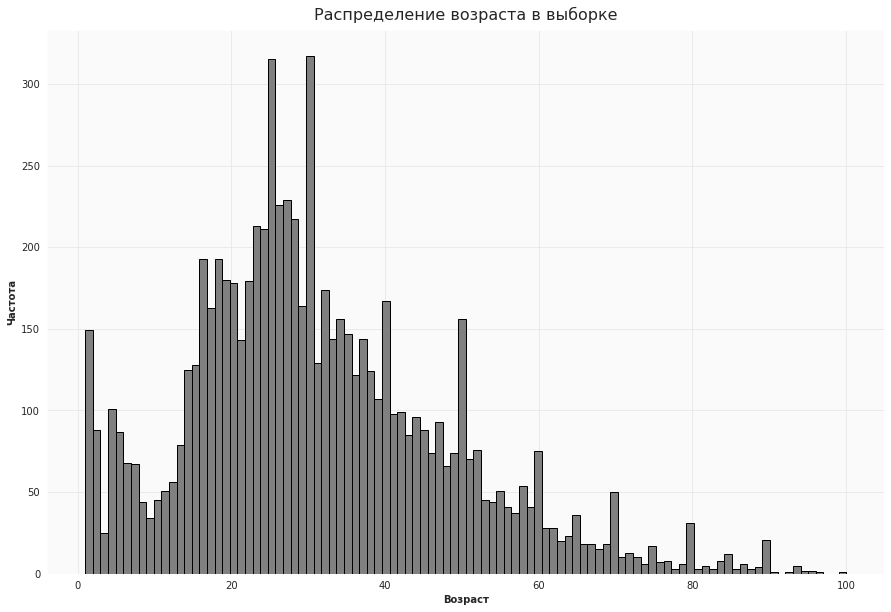

In [16]:
# Построим график распределения возраста

plt.figure(figsize=(15, 10))
plt.hist(labels['real_age'], bins=100, color='gray', edgecolor='black')
plt.title("Распределение возраста в выборке")
plt.xlabel("Возраст")
plt.ylabel("Частота")
plt.show()

**Из представленных данных можно сделать выводы:**

>`Разнообразие возрастов:` датасет содержит фотографии людей от 1 до 100 лет. Это хорошо, так как в данных есть разнообразие возрастных групп, что может сделать модель более точной  

>`Средний возраст:` Средний возраст в выборке составляет около 31 года  

> `На круглых датах` — 25, 30, 40, 50, 60, 70, 80, 90 лет — наблюдаются пики, возможно назывался приблизительный возраст  

>`Наиболее часто встречающиеся возраст:` В выборке чаще всего встречаются 30, 25, 27, 26 и 28 лет  

>`Процентное распределение по возрастным группам:` Более 43% данных относятся к возрастной группе 19-35 лет. Это говорит о том, что в выборке много молодых людей. Возрастные группы 0-18, 36-50, 51-65 и 66-100 лет также представлены, но с меньшей частотой  

>`Стандартное отклонение:` Высокое стандартное отклонение  может указывать на значительную дисперсию возрастов в данных 

In [18]:
# Выведем несколько фотографий

# image_indices = range(10, 16)

# fig, axes = plt.subplots(1, len(image_indices), figsize=(15, 4))

# data_dir = 'C:/Users/Admin/Desktop/faces/datasets/faces/final_files'

# for i, idx in enumerate(image_indices):
#     image_path = os.path.join(data_dir, labels.iloc[idx]['file_name'])
#     image = Image.open(image_path)
#     axes[i].imshow(image)
#     axes[i].set_title(f'Возраст: {labels.iloc[idx]["real_age"]} лет')
#     axes[i].axis('off')

# plt.show()

### Вывод

**Объем данных и его достаточность:**  

>В датасете насчитывается 7591 фотография с возрастами, варьирующимися от 1 до 100 лет. Несмотря на неплохой разброс возрастов, количество данных ограничено, особенно для обучения глубоких нейронных сетей. Большинство современных архитектур требуют значительного объема данных для достижения высокой производительности  

**Рекомендации по улучшению обучения модели:**  

>`Аугментация данных:` Один из подходов для увеличения размера обучающего датасета - это использование аугментации данных. Можно применить случайные трансформации (повороты, масштабирование, отражение, изменение яркости) к существующим изображениям для создания дополнительных вариаций  

>`Использование предобученных моделей:` Можно воспользоваться предобученными моделями, обученными на более крупных датасетах, таких как ImageNet, и дообучить их на имеющихся данных  

>`Использование более простых моделей:` Вместо глубоких архитектур можно рассмотреть менее глубокие модели с меньшим числом параметров. Они могут быть более устойчивыми к недостаточному количеству данных  

**Анализ возрастных данных:**  

>`Разнообразие возрастов:` В датасете представлены фотографии людей всех возрастов от 1 до 100 лет. Это положительное обстоятельство, так как разнообразие возрастных групп способствует обучению модели более точно предсказывать возраст  

>`Средний возраст:` Средний возраст в выборке составляет около 31 года. Эта информация может помочь нам понять, какие возрастные группы представлены в датасете  

>`Наиболее часто встречающиеся возрасты:` В выборке наиболее часто встречаются фотографии людей возрастом 30, 25, 27, 26 и 28 лет  

>`Процентное распределение по возрастным группам:` Более 43% данных относятся к возрастной группе 19-35 лет, что указывает на преобладание молодых людей в выборке  

>`Дисперсия возрастных данных:` Высокое стандартное отклонение (17.15) говорит о значительной дисперсии. Дисперсия предоставляет информацию о степени изменчивости возраста. Если дисперсия высока это означает, что возрастные данные имеют большой разброс вокруг среднего значения, а если дисперсия низкая то наоборот. Высокая дисперсия может быть интерпретирована как большая разница между возрастами в выборке, в то время как низкая дисперсия указывает на более узкое распределение возрастов вокруг среднего значения  

## Обучение модели. Вариант 3

```python

# < скопируйте код сюда >

PATH_IMAGES = 'C:/Users/Admin/Desktop/faces/datasets/faces/final_files'  

def load_data(mode):
    '''
    Создает "генератор изображений" (изображения загружает из заданной папки).
    mode: "training" — создание обучающего набора,
          "validation" — создание валидационного набора,
    '''

    data = pd.read_csv('C:/Users/Admin/Desktop/faces/datasets/faces/labels.csv')

    if mode == 'training':
        data_gen = ImageDataGenerator(
                                      rescale=1/255,
                                      validation_split=VALID_FRAC,
                                     )
    elif mode == 'validation':
        data_gen = ImageDataGenerator(
                                      rescale=1/255,
                                      validation_split=VALID_FRAC,
                                     )

    data_gen_flow = data_gen.flow_from_dataframe(
                                                 directory=PATH_IMAGES,
                                                 dataframe=data,
                                                 x_col='file_name',
                                                 y_col='real_age',
                                                 target_size=TARGET_SIZE,
                                                 batch_size=BATCH_SIZE,
                                                 subset=mode,
                                                 class_mode='raw',
                                                 seed=RS,
                                                )
    return data_gen_flow  

def create_model(input_shape):
    '''
    Создание модели на базе ResNet50.
    input_shape: форма входного тензора.
    '''

    backbone = ResNet50(
                        input_shape=input_shape,
                        weights='imagenet',
                        include_top=False,
                       )
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    model.compile(loss=LOSS, optimizer=Adam(learning_rate=LEARNING_RATE), metrics=METRICS)

    return model  

def train_model(model, data_train, data_test,
                batch_size=None, epochs=1,
                steps_train=None, steps_valid=None):

    if steps_train is None:
        steps_train = len(data_train)
    if steps_valid is None:
        steps_valid = len(data_test)

    model.fit(
              data_train,
              validation_data=data_test,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_train,
              validation_steps=steps_valid,
              verbose=2,
             )

    return model

%%time

    model = train_model(
                        model=create_model(input_shape=INPUT_SHAPE),
                        data_train=load_data(mode='training'),
                        data_test=load_data(mode='validation'),
                        batch_size=BATCH_SIZE,
                        epochs=EPOCHS,
#                         steps_train=1,
#                         steps_valid=1,
                       )

# Получите последнее значение MAE
```

```

# < скопируйте результат вывода на экран сюда >

Found 6073 validated image filenames.
Found 1518 validated image filenames.
Epoch 1/10
380/380 - 430s - loss: 317.8112 - mae: 13.2307 - val_loss: 516.3353 - val_mae: 17.3333 - 430s/epoch - 1s/step
Epoch 2/10
380/380 - 422s - loss: 108.5456 - mae: 7.9339 - val_loss: 193.2786 - val_mae: 10.4436 - 422s/epoch - 1s/step
Epoch 3/10
380/380 - 423s - loss: 61.7294 - mae: 6.0247 - val_loss: 102.7558 - val_mae: 7.7372 - 423s/epoch - 1s/step
Epoch 4/10
380/380 - 424s - loss: 36.3859 - mae: 4.6567 - val_loss: 102.6790 - val_mae: 7.6274 - 424s/epoch - 1s/step
Epoch 5/10
380/380 - 425s - loss: 27.6809 - mae: 4.0713 - val_loss: 101.9409 - val_mae: 7.7393 - 425s/epoch - 1s/step
Epoch 6/10
380/380 - 426s - loss: 23.6459 - mae: 3.7188 - val_loss: 93.6605 - val_mae: 7.4321 - 426s/epoch - 1s/step
Epoch 7/10
380/380 - 423s - loss: 19.5597 - mae: 3.3891 - val_loss: 100.6324 - val_mae: 7.4877 - 423s/epoch - 1s/step
Epoch 8/10
380/380 - 425s - loss: 15.9398 - mae: 3.0702 - val_loss: 89.8797 - val_mae: 7.2447 - 425s/epoch - 1s/step
Epoch 9/10
380/380 - 423s - loss: 14.5531 - mae: 2.9256 - val_loss: 99.4930 - val_mae: 7.6986 - 423s/epoch - 1s/step
Epoch 10/10
380/380 - 423s - loss: 14.9610 - mae: 2.9461 - val_loss: 95.9471 - val_mae: 7.5907 - 423s/epoch - 1s/step
Wall time: 1h 10min 45s

# < длинные строки со скачиванием модели можно удалить >

```

## Вывод

**Построение и Обучение Модели:**  

>Для решения задачи определения возраста на фотографиях была использована архитектура нейронной сети ResNet50. В качестве предобученной модели была выбрана модель с весами, обученными на наборе данных ImageNet. Данная модель была загружена без верхних слоев (include_top=False), что позволило использовать ее для извлечения признаков из изображений  

**Обучение:**

>Количество эпох: 10  
Размер батча: 16   
Оптимизатор: Adam с learning rate 0.0001  
Аугментация данных: В качестве аугментации данных было применено масштабирование пикселей изображений в диапазоне [0, 1]  

**Результаты:**  

>Модель обучалась на наборе данных, разделенном на обучающую и валидационную выборки в соотношении 80/20. Обучение проходило в течение 10 эпох  

**Полученные результаты модели на валидационной выборке:**  

>Loss (MAE) после 10 эпох обучения: 7.5907 

**Оценка и Выводы:**  

>Используя архитектуру ResNet50 с предобученными весами, мы получили среднюю абсолютную ошибку (MAE) около 2.9461 на валидационной выборке. Это означает, что модель в среднем ошибается на 2.9461 лет при предсказании возраста на новых фотографиях  

>Что касается переобучения, модель не столкнулась с переобучением в процессе обучения. Это может быть связано с использованием предобученных весов и аугментацией данных, что способствует лучшей обобщающей способности модели  